<a href="https://colab.research.google.com/github/Justin-Bjorn-Sanchez/CPE-311/blob/main/seatwork_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/RT_IOT2022.csv')
df.fillna(0)
df['Attack_type'].value_counts()

,count
Attack_type,
DOS_SYN_Hping,94659
Thing_Speak,8108
ARP_poisioning,7750
MQTT_Publish,4146
NMAP_UDP_SCAN,2590
NMAP_XMAS_TREE_SCAN,2010
NMAP_OS_DETECTION,2000
NMAP_TCP_scan,1002
DDOS_Slowloris,534


In [ ]:
# creation of new data in order to keep the original and also to get the coloumns to use later on.
# renaming data so that the words look more better

data = df[['Attack_type',
           'proto',
           'service',
           'flow_SYN_flag_count',
           'flow_RST_flag_count',
           'fwd_PSH_flag_count',
          ]]

data.rename(columns={
           'proto': 'Protocol',
           'service': 'Service',
           'flow_SYN_flag_count': 'SYN_flag_count',
           'flow_RST_flag_count': 'RST_flag_count',
           'fwd_PSH_flag_count': 'PSH_flag_count'
            }, inplace=True)

<ipython-input-176-52598f8009db>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={


In [ ]:
data['Attack_type'].value_counts()

,count
Attack_type,
DOS_SYN_Hping,94659
Thing_Speak,8108
ARP_poisioning,7750
MQTT_Publish,4146
NMAP_UDP_SCAN,2590
NMAP_XMAS_TREE_SCAN,2010
NMAP_OS_DETECTION,2000
NMAP_TCP_scan,1002
DDOS_Slowloris,534


### What is the distribution of the Attack_type classes (normal vs. various attacks), and what percentage of the 123,117 instances does each class comprise?

In [ ]:
# to check each names. i get the names of each attack type and i have placed it inside a list because i might use it for later.
names = data.Attack_type.unique()[:12]
new_list = []
for i in names:
 new_list.append(i)

print(new_list)

['MQTT_Publish', 'Thing_Speak', 'Wipro_bulb', 'ARP_poisioning', 'DDOS_Slowloris', 'DOS_SYN_Hping', 'Metasploit_Brute_Force_SSH', 'NMAP_FIN_SCAN', 'NMAP_OS_DETECTION', 'NMAP_TCP_scan', 'NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN']


In [ ]:
#checking of name
check_name = (data['Attack_type'] == 'Thing_Speak').sum()
check_name

np.int64(8108)

In [ ]:
# write the various and normal attack types into a seperate lists.
various = [
    'DOS_SYN_Hping',
    'ARP_poisioning',
    'NMAP_UDP_SCAN',
    'NMAP_XMAS_TREE_SCAN',
    'NMAP_OS_DETECTION',
    'NMAP_TCP_scan',
    'DDOS_Slowloris',
    'Metasploit_Brute_Force_SSH',
    'NMAP_FIN_SCAN'
]

normal = [
    'MQTT_Publish',
    'Thing_Speak',
    'Wipro_bulb'
]

In [ ]:
# use of basic addition for loop of each name
v_count = 0
for i in various:
    v_add = (data['Attack_type'] == i ).sum()
    v_count = v_count + v_add

print(v_count)

110610


In [ ]:
# i have only copied the last block of code since i always get error if i turned it into a function
n_count = 0
for i in normal:
    n_add = (data['Attack_type'] == i ).sum()
    n_count = n_count + n_add

print(n_count)

12507


In [ ]:
# this block of code is for output and i also included percentage conversion.
v_per = 100 * v_count / data['Attack_type'].value_counts().sum()
n_per = 100 * n_count / data['Attack_type'].value_counts().sum()

print(f'Counts of normal attacks: {n_count} {n_per:.2f}%\nCounts of various attacks: {v_count} {v_per:.2f}%')

Counts of normal attacks: 12507 10.16%
Counts of various attacks: 110610 89.84%


In [ ]:
#use of value_counts to count the values inside the column and then multiplied to 100 to output as standard numerical percentage
attack_type_percentage = data['Attack_type'].value_counts(normalize= True) * 100

#use of apply with lambda to manipulate output as 2 decimals with a '%' string.
portions = attack_type_percentage.apply(lambda x: f'{x:.2f}%')
portions

,proportion
Attack_type,
DOS_SYN_Hping,76.89%
Thing_Speak,6.59%
ARP_poisioning,6.29%
MQTT_Publish,3.37%
NMAP_UDP_SCAN,2.10%
NMAP_XMAS_TREE_SCAN,1.63%
NMAP_OS_DETECTION,1.62%
NMAP_TCP_scan,0.81%
DDOS_Slowloris,0.43%


### How do the categorical features proto (protocol) and service vary across different attack types and normal traffic patterns?

In [ ]:
# recalling the new dataframe so I wont repeat scroll up too far back again and again.
data.head(3)

,Attack_type,Protocol,Service,SYN_flag_count,RST_flag_count,PSH_flag_count
0,MQTT_Publish,tcp,mqtt,2,1,3
1,MQTT_Publish,tcp,mqtt,2,1,3
2,MQTT_Publish,tcp,mqtt,2,1,3


In [ ]:
# checking unique existing values
data['Protocol'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [ ]:
# checking unique existing values
data['Service'].unique()

array(['mqtt', '-', 'http', 'dns', 'ntp', 'ssl', 'dhcp', 'irc', 'ssh',
       'radius'], dtype=object)

In [ ]:
#storing the filtered data by the use of isin to get specific values. (top 3 common attack)

common = data[(df['Attack_type'].isin(['DOS_SYN_Hping','Thing_Speak','ARP_poisioning']))]
common

,Attack_type,Protocol,Service,SYN_flag_count,RST_flag_count,PSH_flag_count
4146,Thing_Speak,tcp,http,2,0,2
4147,Thing_Speak,udp,dns,0,0,0
4148,Thing_Speak,tcp,http,2,0,2
4149,Thing_Speak,udp,dns,0,0,0
4150,Thing_Speak,tcp,http,2,0,2
...,...,...,...,...,...,...
115445,DOS_SYN_Hping,tcp,-,1,0,0
115446,DOS_SYN_Hping,tcp,-,1,0,0
115447,DOS_SYN_Hping,tcp,-,1,0,0
115448,DOS_SYN_Hping,tcp,-,1,0,0


In [ ]:
#storing the filtered data by the use of isin to get specific values. (uncommon attacks)

uncommon = data[(df['Attack_type'].isin([
          'MQTT_Publish',
          'NMAP_UDP_SCAN',
          'NMAP_XMAS_TREE_SCAN',
          'NMAP_OS_DETECTION',
          'NMAP_TCP_scan',
          'DDOS_Slowloris',
          'Wipro_bulb',
          'Metasploit_Brute_Force_SSH',
          'NMAP_FIN_SCAN'
]))]
uncommon

,Attack_type,Protocol,Service,SYN_flag_count,RST_flag_count,PSH_flag_count
0,MQTT_Publish,tcp,mqtt,2,1,3
1,MQTT_Publish,tcp,mqtt,2,1,3
2,MQTT_Publish,tcp,mqtt,2,1,3
3,MQTT_Publish,tcp,mqtt,2,1,3
4,MQTT_Publish,tcp,mqtt,2,1,3
...,...,...,...,...,...,...
123112,NMAP_XMAS_TREE_SCAN,tcp,-,0,1,1
123113,NMAP_XMAS_TREE_SCAN,tcp,-,0,1,1
123114,NMAP_XMAS_TREE_SCAN,tcp,-,0,1,1
123115,NMAP_XMAS_TREE_SCAN,tcp,-,0,1,1


In [ ]:
'''
Using of groupby to filter the columns to display then followed by size function to count the values.
I used reset index in order to reformat the output as well as displaying the counts of each protocols and service used.
'''

ps_counts = common.groupby(['Attack_type', 'Protocol', 'Service']).size().reset_index(name='count')
ps_counts

# it displays combinations

,Attack_type,Protocol,Service,count
0,ARP_poisioning,icmp,-,8
1,ARP_poisioning,tcp,-,214
2,ARP_poisioning,tcp,dns,125
3,ARP_poisioning,tcp,http,129
4,ARP_poisioning,tcp,ssl,1459
5,ARP_poisioning,udp,-,324
6,ARP_poisioning,udp,dhcp,26
7,ARP_poisioning,udp,dns,5458
8,ARP_poisioning,udp,ntp,7
9,DOS_SYN_Hping,tcp,-,94659


In [ ]:
#checking to see if some data were not read
ps_counts['count'].sum()

np.int64(110517)

### Which network flag counts (e.g., flow_SYN_flag_count, flow_RST_flag_count, fwd_PSH_flag_count) are most indicative of specific intrusion patterns?

In [ ]:
# similar to the previous code but for the count of each flags in each top 3 common attack types.
f_counts = common.groupby('Attack_type')[['SYN_flag_count', 'RST_flag_count', 'PSH_flag_count']].sum().reset_index()
f_counts

,Attack_type,SYN_flag_count,RST_flag_count,PSH_flag_count
0,ARP_poisioning,3786,1324,15142
1,DOS_SYN_Hping,94659,84969,0
2,Thing_Speak,7571,2046,8978


## Visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# renaming of values inside the attack type of the newly created dataframe for top 3 common attack types

ex_top = common['Attack_type'].replace([
          'MQTT_Publish',
          'NMAP_UDP_SCAN',
          'NMAP_XMAS_TREE_SCAN',
          'NMAP_OS_DETECTION',
          'NMAP_TCP_scan',
          'DDOS_Slowloris',
          'Wipro_bulb',
          'Metasploit_Brute_Force_SSH',
          'NMAP_FIN_SCAN'
], 'Other',inplace=True)


In [ ]:
common

,Attack_type,Protocol,Service,SYN_flag_count,RST_flag_count,PSH_flag_count
4146,Thing_Speak,tcp,http,2,0,2
4147,Thing_Speak,udp,dns,0,0,0
4148,Thing_Speak,tcp,http,2,0,2
4149,Thing_Speak,udp,dns,0,0,0
4150,Thing_Speak,tcp,http,2,0,2
...,...,...,...,...,...,...
115445,DOS_SYN_Hping,tcp,-,1,0,0
115446,DOS_SYN_Hping,tcp,-,1,0,0
115447,DOS_SYN_Hping,tcp,-,1,0,0
115448,DOS_SYN_Hping,tcp,-,1,0,0


In [ ]:
pd.DataFrame({'Attack_type': 'Other', 'count': [int(uncommon['Attack_type'].count())]}).reset_index()

,index,Attack_type,count
0,0,Other,12600


In [ ]:
# combining of values since the newly created data of top 3 common attack types and the excluded got seperated
top_percentage = common['Attack_type'].value_counts().reset_index()
top_percentage = pd.concat([top_percentage, pd.DataFrame({'Attack_type': 'Other', 'count': [int(uncommon['Attack_type'].count())]}).reset_index()]).reset_index()
top_percentage

,level_0,Attack_type,count,index
0,0,DOS_SYN_Hping,94659,NaN
1,1,Thing_Speak,8108,NaN
2,2,ARP_poisioning,7750,NaN
3,0,Other,12600,0.0


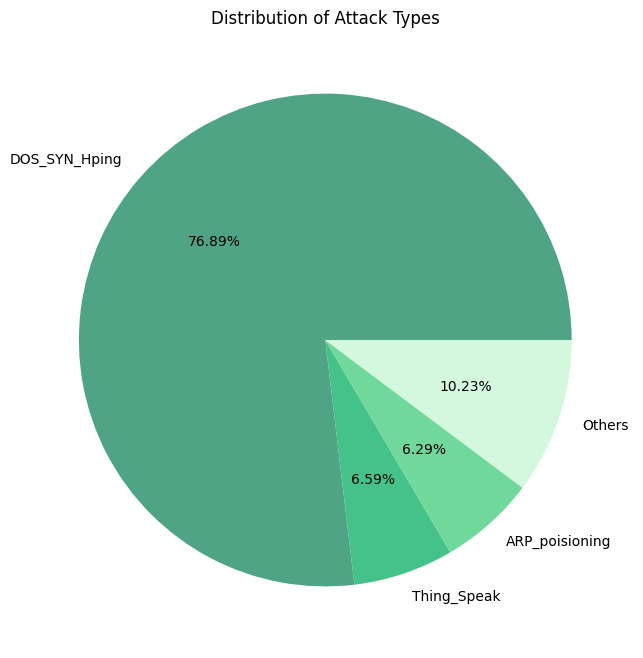

In [ ]:
labels = ['DOS_SYN_Hping',
          'Thing_Speak',
          'ARP_poisioning',
          'Others',
         ]

sizes = top_percentage['count']

fig, ax = plt.subplots(figsize = (10,8))
ax.pie(sizes, colors=['#4FA486','#44C28A', '#6FD89A', '#D4F8DE'], labels=labels, autopct='%1.2f%%')

plt.title('Distribution of Attack Types')
plt.show()

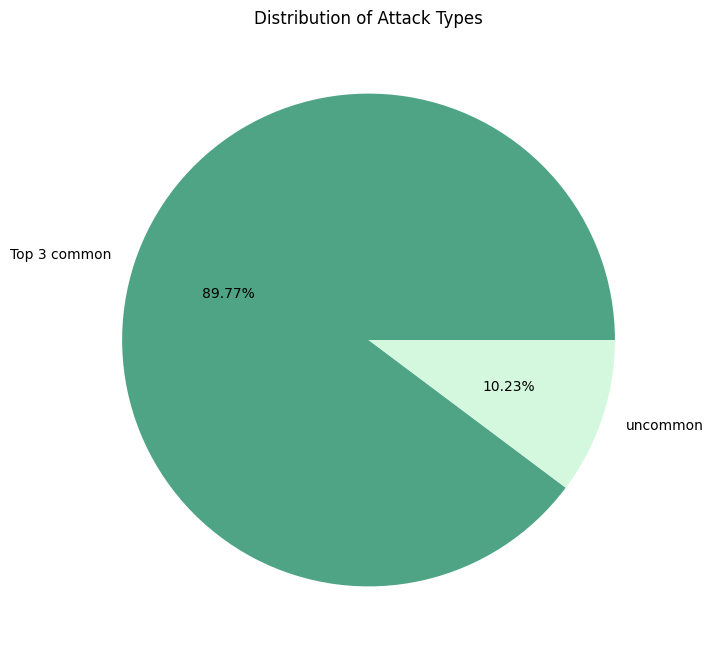

In [ ]:
labels = ['Top 3 common','uncommon']

sizes = [common.Attack_type.count(), uncommon.Attack_type.count()]

fig, ax = plt.subplots(figsize = (10,8))
ax.pie(sizes, colors=['#4FA486', '#D4F8DE'], labels=labels, autopct='%1.2f%%')

plt.title('Distribution of Attack Types')
plt.show()

In [ ]:
f_counts

,Attack_type,SYN_flag_count,RST_flag_count,PSH_flag_count
0,ARP_poisioning,3786,1324,15142
1,DOS_SYN_Hping,94659,84969,0
2,Thing_Speak,7571,2046,8978


In [ ]:
# initialize reusable variable
attack = f_counts['Attack_type']
syn_flag = f_counts['SYN_flag_count']
rst_flag = f_counts['RST_flag_count']
psh_flag = f_counts['PSH_flag_count']

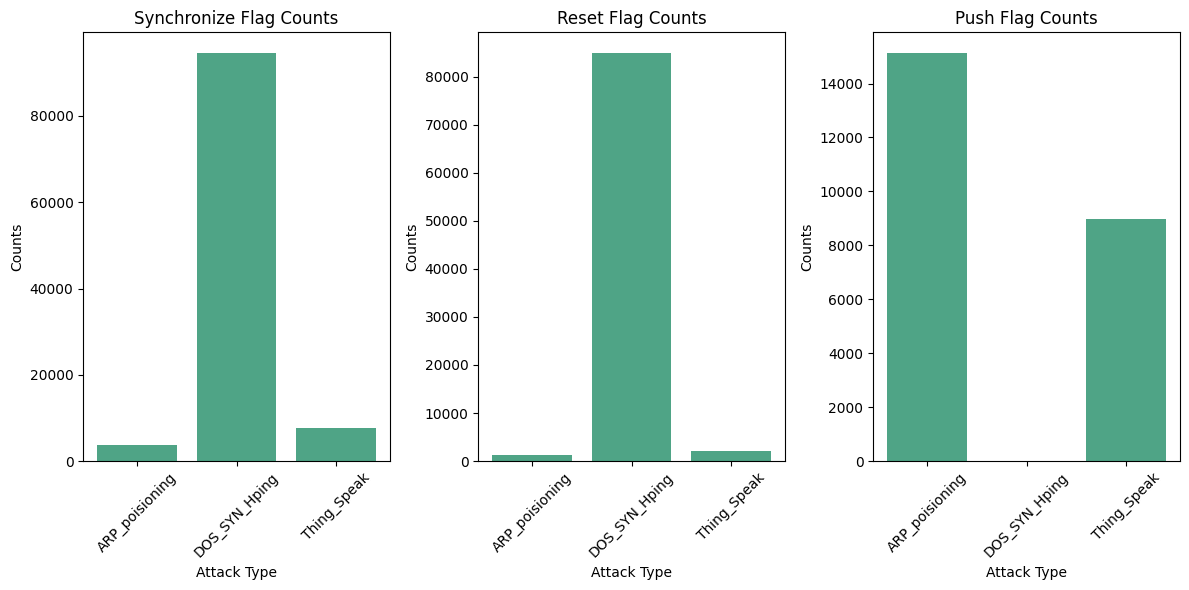

In [ ]:
#use of fig and ax as a variable for subplots in order to customize the desired output and to prevent overlapping texts.

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

# SYN Plot
ax[0].bar(attack, syn_flag, color='#4FA486')
ax[0].set_title('Synchronize Flag Counts')
ax[0].set_xlabel('Attack Type')
ax[0].set_ylabel('Counts')
ax[0].tick_params(axis='x', rotation=45, labelsize=10)

# RST Plot
ax[1].bar(attack, rst_flag, color='#4FA486')
ax[1].set_title('Reset Flag Counts')
ax[1].set_xlabel('Attack Type')
ax[1].set_ylabel('Counts')
ax[1].tick_params(axis='x', rotation=45, labelsize=10)

# PSH Plot
ax[2].bar(attack, psh_flag, color='#4FA486')
ax[2].set_title('Push Flag Counts')
ax[2].set_xlabel('Attack Type')
ax[2].set_ylabel('Counts')
ax[2].tick_params(axis='x', rotation=45, labelsize=10)

# use of tight layout to compress while not overlapping texts.
plt.tight_layout()
plt.show()